<a href="https://colab.research.google.com/github/Iqubal121/Data-Science-Tutorials/blob/main/Weather_EDA_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Weather Data**

This dataset contains synthetic weather data generated for ten different locations, including New York, Los Angeles, Chicago, Houston, Phoenix, Philadelphia, San Antonio, San Diego, Dallas, and San Jose. The data includes information about temperature, humidity, precipitation, and wind speed, with 1 million data points generated for each parameter.

**Data set link**

https://www.kaggle.com/datasets/muthuj7/weather-dataset?resource=download

### **Requirements**

**General Requirements for EDA:**

**Data Cleaning:**

Identify and handle missing values across all columns.

**Outlier Detection:**

Establish methods for detecting and addressing outliers in numerical columns.

**Comparative Analysis:**

Prepare visualizations (scatter plots, heatmaps) to compare relationships between different columns.

**Feature Engineering:**

Identify opportunities for creating new features from existing data (e.g., discomfort index from temperature and humidity).

#### **import libraries and dataset**

In [1]:
import pandas as pd
import numpy as np

# import the dataset
data = pd.read_csv('/content/weatherHistory.csv')


# read the dataset
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


#### **Column Operations**

General Operations Across All Columns



**Missing Value Analysis**

Identify and analyze the presence of missing values across all columns.


In [2]:
data.isna().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [3]:
# find the types of values in Precip Type
data['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [4]:
# fill the nan values with the random values from the Precip Type
data['Precip Type'] = data['Precip Type'].fillna(np.random.choice(['rain', 'snow']))


In [5]:
data.isna().sum()

,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0



**Outlier Detection**

Identify outliers in numerical columns and assess their impact on the analysis.



In [6]:
# find the outliners for all the related columns
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


**Comparative Analysis**

Compare the relationships between different columns and visualize these relationships using scatter plots or heatmaps.



**Feature Engineering**

Create new features based on existing data (e.g., combining temperature and humidity to create a discomfort index).



In [7]:
# Create new features based on existing data (e.g., combining temperature and humidity to create a discomfort index)
data['discomfort_index'] = 0.81 * data['Temperature (C)'] * (1.0 - 0.01 * data['Humidity'])

In [8]:
# find the tempreture Differences
data["Tempreture Differences"] = data["Temperature (C)"] - data["Apparent Temperature (C)"]

In [9]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'discomfort_index',
       'Tempreture Differences'],
      dtype='object')

In [10]:
data.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,discomfort_index,Tempreture Differences
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,7.604215,2.083333
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,7.512829,2.127778
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,7.528396,0.000000
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,6.658274,2.344444
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,7.033136,1.777778


By applying these **EDA** operations you can gain insights into the characteristics and relationships within your weather dataset, enabling more informed analyses and conclusions.

### **Formatted Date**


**Date Range Analysis**

Determine the start and end dates of the dataset.

In [11]:
# find the start date
data['Formatted Date'].min()

'2006-01-01 00:00:00.000 +0100'

In [12]:
# find the end data
data['Formatted Date'].max()

'2016-12-31 23:00:00.000 +0100'

In [13]:
# now check the data set
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,discomfort_index,Tempreture Differences
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,7.604215,2.083333
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,7.512829,2.127778



**Time Series Analysis**

Plot time series graphs to observe trends over time (e.g., average temperature or humidity per day).



In [14]:
# Plot time series graphs to observe trends over time (e.g., average temperature or humidity per day).

# Convert 'Formatted Date' to datetime format
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], errors='coerce', utc=True)


In [15]:
# che3ck the datatypes
print(data['Formatted Date'].dtype)

datetime64[ns, UTC]


In [16]:
# check if there is any null values
data["Formatted Date"].isna().sum()

0

In [17]:
# fill all the nan values with random values form the Formatted data
data["Formatted Date"] = data["Formatted Date"].fillna(np.random.choice(data["Formatted Date"]))

In [18]:
# check if there is any
data["Formatted Date"].isna().sum()

0

In [19]:
# now extracted date and time
data['Date'] = data['Formatted Date'].dt.date
data['Time'] = data['Formatted Date'].dt.time


In [20]:
# place the date and time at the begining of the dataset
data = data[['Date', 'Time'] + data.columns[:-2].tolist()]
data.head()

,Date,Time,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,discomfort_index,Tempreture Differences
0,2006-03-31,22:00:00,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,7.604215,2.083333
1,2006-03-31,23:00:00,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,7.512829,2.127778
2,2006-04-01,00:00:00,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,7.528396,0.000000
3,2006-04-01,01:00:00,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,6.658274,2.344444
4,2006-04-01,02:00:00,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,7.033136,1.777778


In [21]:
# Calculate daily averages for temperature and humidity
daily_data = data.groupby('Date').agg({
    'Temperature (C)': 'mean',
    'Humidity': 'mean'
}).reset_index()

In [22]:
daily_data

,Date,Temperature (C),Humidity
0,2005-12-31,0.577778,0.890000
1,2006-01-01,4.075000,0.817083
2,2006-01-02,5.263194,0.847083
3,2006-01-03,2.340509,0.897083
4,2006-01-04,2.251852,0.906667
...,...,...,...
4014,2016-12-27,0.278009,0.890000
4015,2016-12-28,0.222222,0.890000
4016,2016-12-29,0.167824,0.889583
4017,2016-12-30,0.117593,0.889167


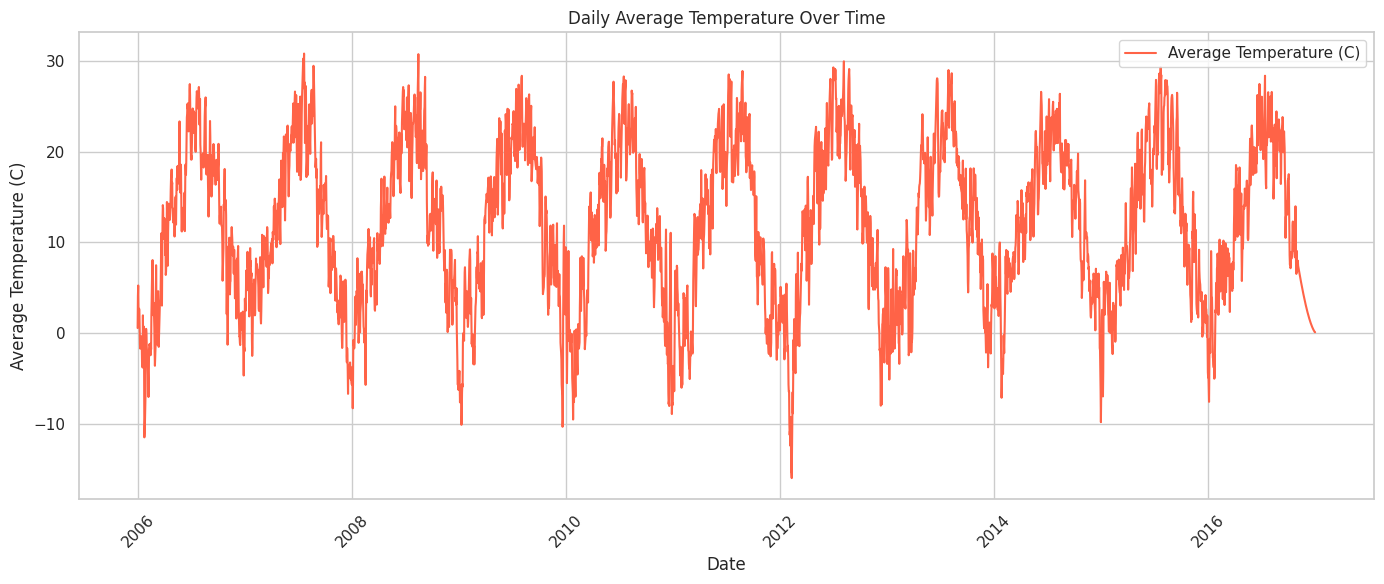

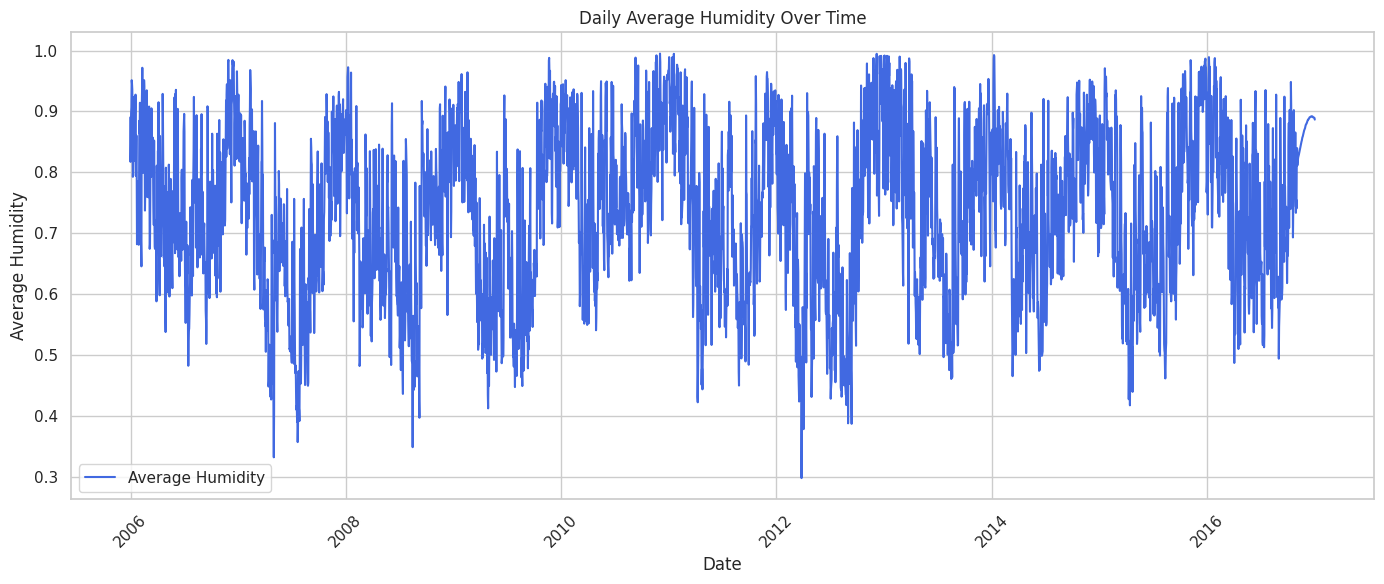

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot daily average temperature
plt.figure(figsize=(14, 6))
plt.plot(daily_data['Date'], daily_data['Temperature (C)'], label='Average Temperature (C)', color='tomato')
plt.xlabel('Date')
plt.ylabel('Average Temperature (C)')
plt.title('Daily Average Temperature Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot daily average humidity
plt.figure(figsize=(14, 6))
plt.plot(daily_data['Date'], daily_data['Humidity'], label='Average Humidity', color='royalblue')
plt.xlabel('Date')
plt.ylabel('Average Humidity')
plt.title('Daily Average Humidity Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Date Component Extraction**

Extract components such as day of the *week, month, or year* for further analysis.



In [24]:
# Extract components such as day of the week, month, or year for further analysis.
data['Day of Week'] = data['Formatted Date'].dt.day_name()
data['Month'] = data['Formatted Date'].dt.month
data['Year'] = data['Formatted Date'].dt.year

In [25]:
# check dataset
data.head(1)

,Date,Time,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,discomfort_index,Tempreture Differences,Day of Week,Month,Year
0,2006-03-31,22:00:00,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,7.604215,2.083333,Friday,3,2006


In [26]:
# get these columns nearbay the Date and Time column
data = data[['Day of Week', 'Month', 'Year'] + data.columns[:-3].tolist()]

In [27]:

data.head()

,Day of Week,Month,Year,Date,Time,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,discomfort_index,Tempreture Differences
0,Friday,3,2006,2006-03-31,22:00:00,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,7.604215,2.083333
1,Friday,3,2006,2006-03-31,23:00:00,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,7.512829,2.127778
2,Saturday,4,2006,2006-04-01,00:00:00,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,7.528396,0.000000
3,Saturday,4,2006,2006-04-01,01:00:00,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,6.658274,2.344444
4,Saturday,4,2006,2006-04-01,02:00:00,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,7.033136,1.777778


In [28]:
# find the nan value in the format date
data['Formatted Date'].isna().sum()

0

In [29]:
# find the unique values in the moths
data['Month'].unique()

array([ 3,  4,  7,  8, 11, 12,  1,  2,  6,  5, 10,  9], dtype=int32)

In [30]:
# find the uniques values in the years
data['Year'].unique()

array([2006, 2005, 2010, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015,
       2016], dtype=int32)

In [31]:
data["Day of Week"].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

**Frequency Analysis**

Count occurrences of data points for each *day, month, or year.*

In [32]:
# Count occurrences of data points for each day, month, or year.
daily_frequency = data['Date'].value_counts().reset_index()
monthly_frequency = data['Month'].value_counts().reset_index()
yearly_frequency = data['Year'].value_counts().reset_index()
print("Daily Frequency:")
print(daily_frequency)
print("\nMonthly Frequency:")
print(monthly_frequency)
print("\nYearly Frequency:")
print(yearly_frequency)

Daily Frequency:
            Date  count
0     2010-08-02     46
1     2010-08-01     26
2     2006-03-31     24
3     2013-02-08     24
4     2013-02-23     24
...          ...    ...
4014  2016-09-08     24
4015  2016-12-31     23
4016  2014-07-14     23
4017  2014-07-13     22
4018  2005-12-31      1

[4019 rows x 2 columns]

Monthly Frequency:
    Month  count
0       8   8208
1       3   8184
2      12   8184
3       1   8184
4       5   8184
5      10   8184
6       7   8181
7       4   7920
8      11   7920
9       6   7920
10      9   7920
11      2   7464

Yearly Frequency:
    Year  count
0   2010   8784
1   2008   8784
2   2012   8784
3   2016   8783
4   2006   8760
5   2007   8760
6   2009   8760
7   2011   8760
8   2013   8760
9   2015   8760
10  2014   8757
11  2005      1


### **Summary**


**Categorization**

Identify common themes or categories from the summary (e.g., “sunny”, “rainy”, “cloudy”).



In [33]:
# Identify common themes or categories from the summary (e.g., “sunny”, “rainy”).
data['Summary'].unique()


array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [34]:
# plot the bar for each values of the summary columns with values as well.

# Count occurrences of each summary
summary_counts = data['Summary'].value_counts()



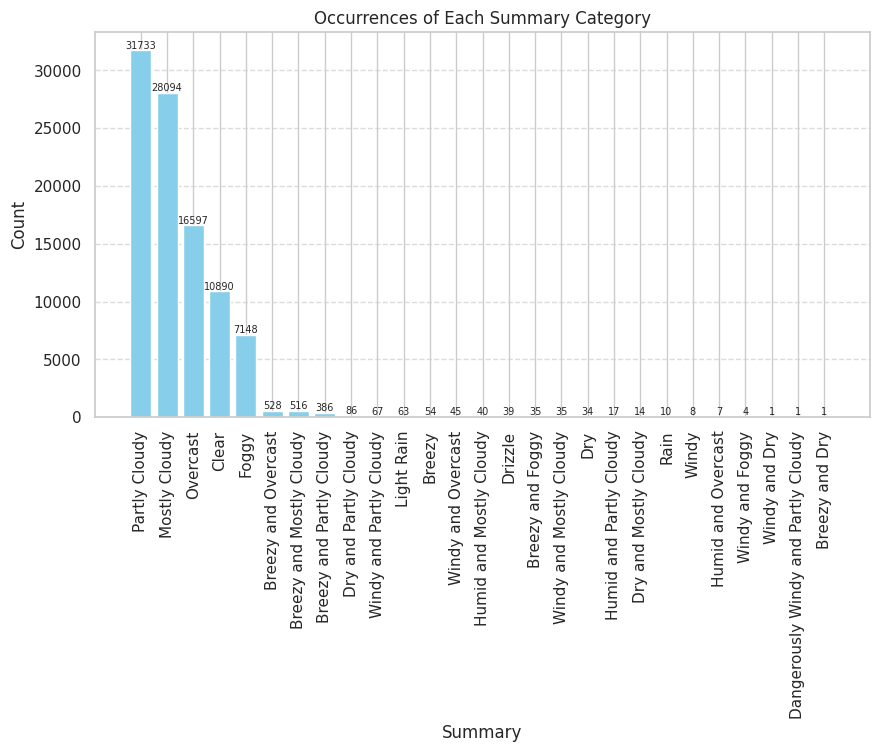

In [35]:
# Step 3: Plot the bar graph
plt.figure(figsize=(10, 5))
bars = plt.bar(summary_counts.index, summary_counts.values, color='skyblue')

# Add counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=7)

plt.title('Occurrences of Each Summary Category')
plt.xlabel('Summary')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Sentiment Analysis**

If applicable, analyze the sentiment of the summaries to gauge weather conditions qualitatively.

### **Precip Type**


**Frequency Counts**

Count occurrences of each precipitation type (e.g., rain, snow, none).



In [36]:
percip = data['Precip Type'].value_counts()
percip

,count
Precip Type,
rain,85741
snow,10712


**Proportion Analysis**

Calculate the proportion of each precipitation type relative to total observations.



In [37]:
# Calculate the proportion of each precipitation type relative to total observations.
percip_proportions = data['Precip Type'].value_counts(normalize=True)
percip_proportions

,proportion
Precip Type,
rain,0.888941
snow,0.111059



**Visualizations**

Use bar charts to visually represent the distribution of precipitation types.




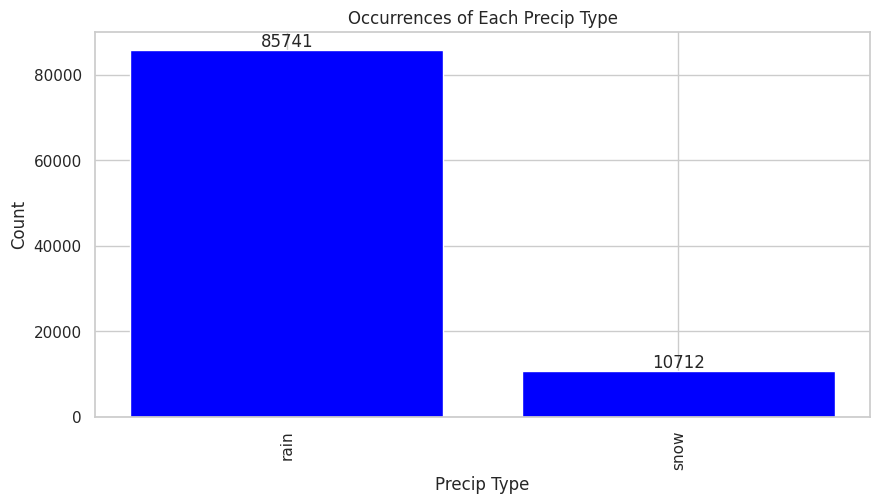

In [38]:
plt.figure(figsize=(10, 5))
bars = plt.bar(percip.index, percip.values, color='blue')

# show the number as well
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.title('Occurrences of Each Precip Type')
plt.xlabel('Precip Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Impact Analysis**

Analyze the effect of different precipitation types on other variables (e.g., temperature or humidity).

In [39]:
# grouping the data on the basis of Tempreture and humadity
type_data = data.groupby('Precip Type').agg({
    'Temperature (C)': 'mean',
    'Humidity': 'mean'
})

In [40]:
type_data


,Temperature (C),Humidity
Precip Type,,
rain,13.832126,0.718862
snow,-3.270885,0.863263


<ipython-input-41-ff1759fa4ef8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precip Type', y='Temperature (C)', data=type_data, palette='Blues')
<ipython-input-41-ff1759fa4ef8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precip Type', y='Humidity', data=type_data, palette='Oranges')


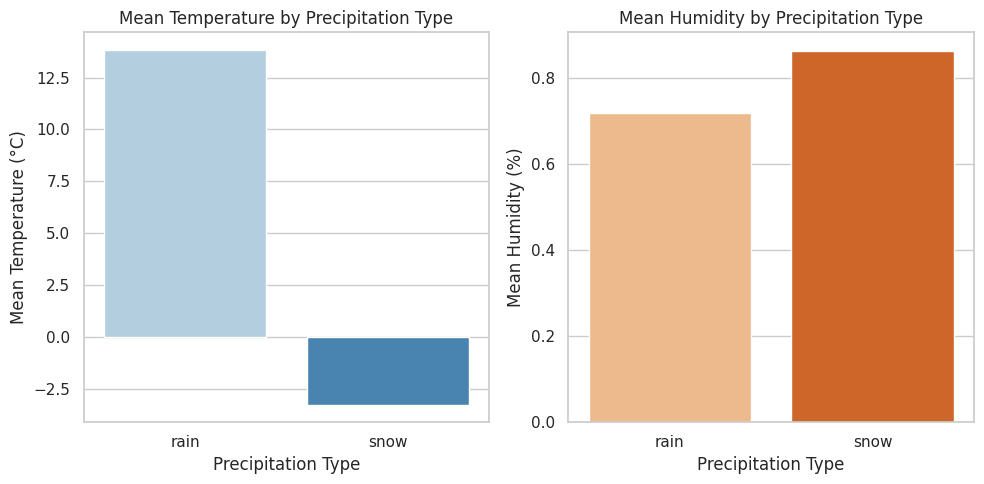

In [41]:
# Set up the figure
plt.figure(figsize=(10, 5))

# Create a subplot for temperature
plt.subplot(1, 2, 1)
sns.barplot(x='Precip Type', y='Temperature (C)', data=type_data, palette='Blues')
plt.title('Mean Temperature by Precipitation Type')
plt.xlabel('Precipitation Type')
plt.ylabel('Mean Temperature (°C)')

# Create a subplot for humidity
plt.subplot(1, 2, 2)
sns.barplot(x='Precip Type', y='Humidity', data=type_data, palette='Oranges')
plt.title('Mean Humidity by Precipitation Type')
plt.xlabel('Precipitation Type')
plt.ylabel('Mean Humidity (%)')

plt.tight_layout()
plt.show()


### **Temperature (C)**


**Descriptive Statistics**

Calculate mean, median, mode, standard deviation, minimum, maximum, and range.



In [42]:
# find the descriptiove Statictics
data['Temperature (C)'].describe()

,Temperature (C)
count,96453.000000
mean,11.932678
std,9.551546
min,-21.822222
25%,4.688889
50%,12.000000
75%,18.838889
max,39.905556


In [43]:
# find the range
data['Temperature (C)'].max() - data['Temperature (C)'].min()


61.727777777777774

**Distribution Analysis**

Plot histograms and box plots to visualize the distribution of temperatures and identify outliers.


<Axes: >

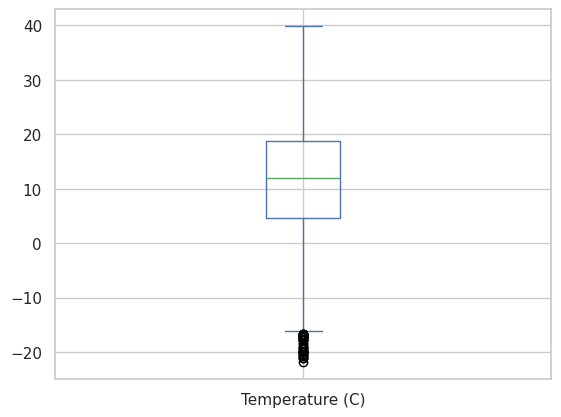

In [44]:
# find the outliers
data['Temperature (C)'].plot(kind='box')


In [45]:
# settle the outliers
Q1 = data['Temperature (C)'].quantile(0.25)
Q3 = data['Temperature (C)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Temperature (C)'] >= lower_bound) & (data['Temperature (C)'] <= upper_bound)]
data.head()

,Day of Week,Month,Year,Date,Time,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,discomfort_index,Tempreture Differences
0,Friday,3,2006,2006-03-31,22:00:00,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,7.604215,2.083333
1,Friday,3,2006,2006-03-31,23:00:00,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,7.512829,2.127778
2,Saturday,4,2006,2006-04-01,00:00:00,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,7.528396,0.000000
3,Saturday,4,2006,2006-04-01,01:00:00,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,6.658274,2.344444
4,Saturday,4,2006,2006-04-01,02:00:00,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,7.033136,1.777778


<Axes: >

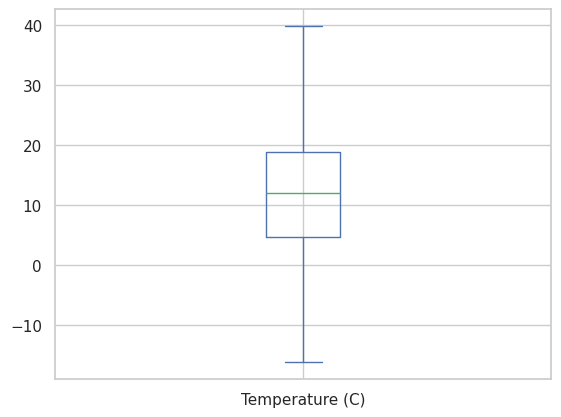

In [46]:
# find the outliers
data['Temperature (C)'].plot(kind='box')

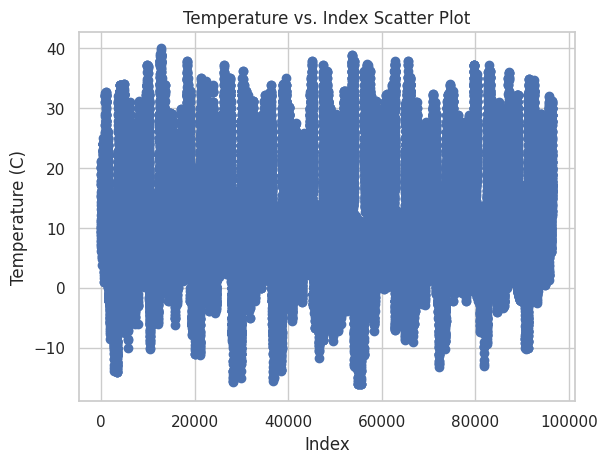

In [47]:
# plot the scatter plot
plt.scatter(data.index, data['Temperature (C)'])
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs. Index Scatter Plot')
plt.show()

**Trend Analysis**

Examine trends in temperature over time (daily, monthly, or seasonally).




In [48]:
# find trens of the temprature on the basis of monthly
monthly_temp = data.groupby(data['Formatted Date'].dt.month)['Temperature (C)'].mean()
monthly_temp

,Temperature (C)
Formatted Date,
1,0.815678
2,2.285229
3,6.914976
4,12.769200
5,16.874455
6,20.728510
7,22.965462
8,22.339134
9,17.503458


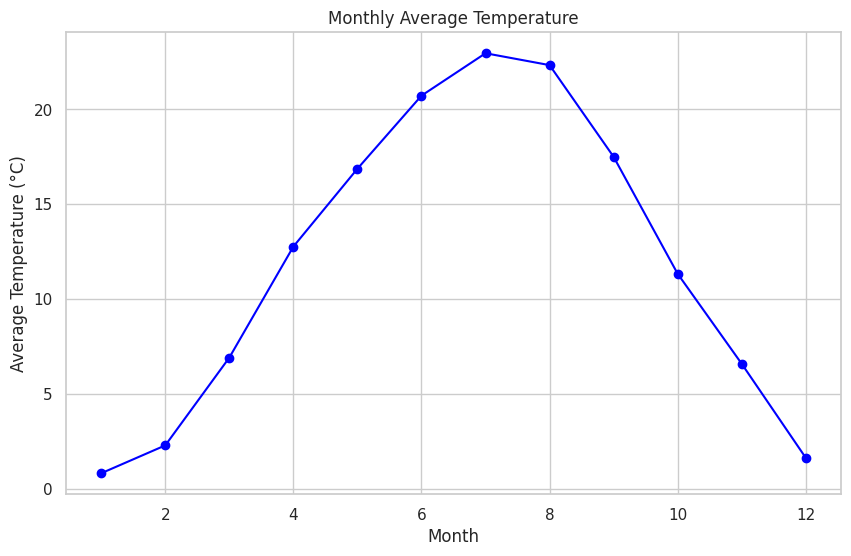

In [49]:
# line plot on the basis of the above formatted date
plt.figure(figsize=(10, 6))
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', linestyle='-', color='blue')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

**Correlation Analysis**

Investigate correlations with other numerical columns, such as humidity or wind speed.

In [50]:
data.columns

Index(['Day of Week', 'Month', 'Year', 'Date', 'Time', 'Formatted Date',
       'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary', 'discomfort_index', 'Tempreture Differences'],
      dtype='object')

In [51]:
# find the correlations of the tempreture dataset
data['Temperature (C)'].corr(data['Wind Speed (km/h)'])

0.007836293159157855

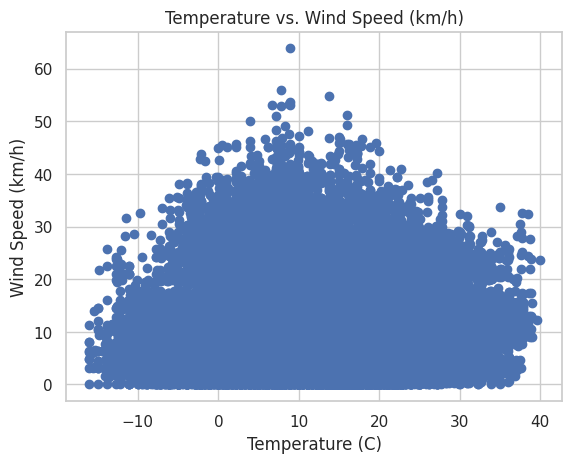

In [52]:
# plot the correlations of the tempreture dataset
plt.scatter(data['Temperature (C)'], data['Wind Speed (km/h)'])
plt.xlabel('Temperature (C)')
plt.ylabel('Wind Speed (km/h)')
plt.title('Temperature vs. Wind Speed (km/h)')
plt.show()

### **Apparent Temperature (C)**


**Descriptive Statistics**

Similar to the Temperature column, calculate key statistics for apparent temperature.



In [53]:
# find the descriptiove Statictics
data['Apparent Temperature (C)'].describe()

,Apparent Temperature (C)
count,96409.000000
mean,10.869615
std,10.677285
min,-24.233333
25%,2.322222
50%,12.011111
75%,18.838889
max,39.344444


<Axes: >

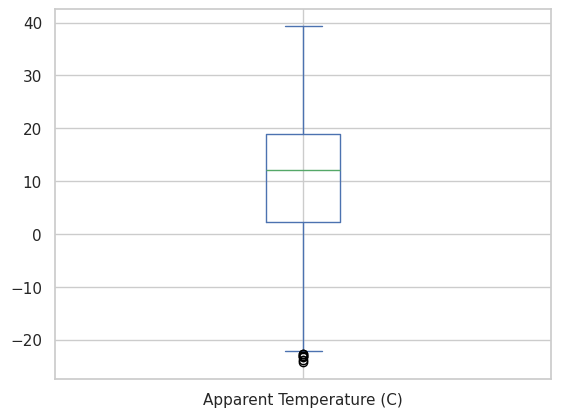

In [54]:
# find the outliers
data['Apparent Temperature (C)'].plot(kind='box')

In [55]:
# find the number of outliers
Q1 = data['Apparent Temperature (C)'].quantile(0.25)
Q3 = data['Apparent Temperature (C)'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

16.516666666666666
-22.452777777777776
43.61388888888889


In [56]:
# settle the outliers
data = data[(data['Apparent Temperature (C)'] >= lower_bound) & (data['Apparent Temperature (C)'] <= upper_bound)]


<Axes: >

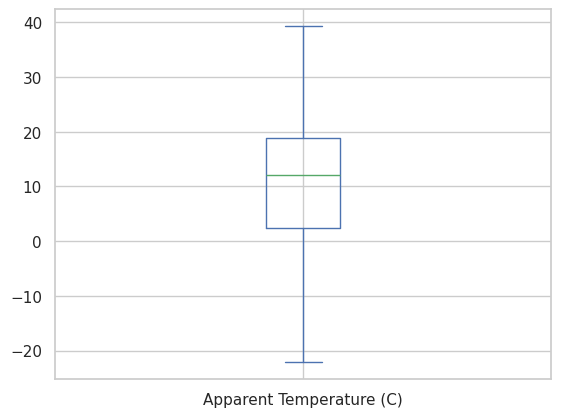

In [57]:
# find the outliers
data['Apparent Temperature (C)'].plot(kind='box')

In [58]:
# find trens of the temprature on the basis of monthly
monthly_temp = data.groupby(data['Formatted Date'].dt.month)['Apparent Temperature (C)'].mean()
monthly_temp

,Apparent Temperature (C)
Formatted Date,
1,-1.938761
2,-0.434272
3,5.082583
4,12.158287
5,16.733265
6,20.755415
7,22.977605
8,22.264600
9,17.389856


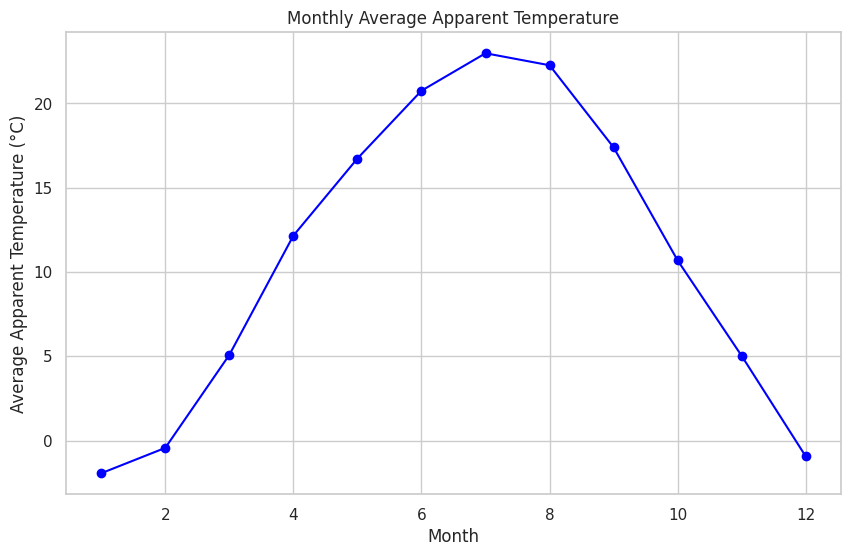

In [59]:
# plot the above data
plt.figure(figsize=(10, 6))
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', linestyle='-', color='blue')
plt.title('Monthly Average Apparent Temperature')
plt.xlabel('Month')
plt.ylabel('Average Apparent Temperature (°C)')
plt.grid(True)
plt.show()


**Comparison with Actual Temperature**

Analyze the difference between actual temperature and apparent temperature to understand heat index effects.



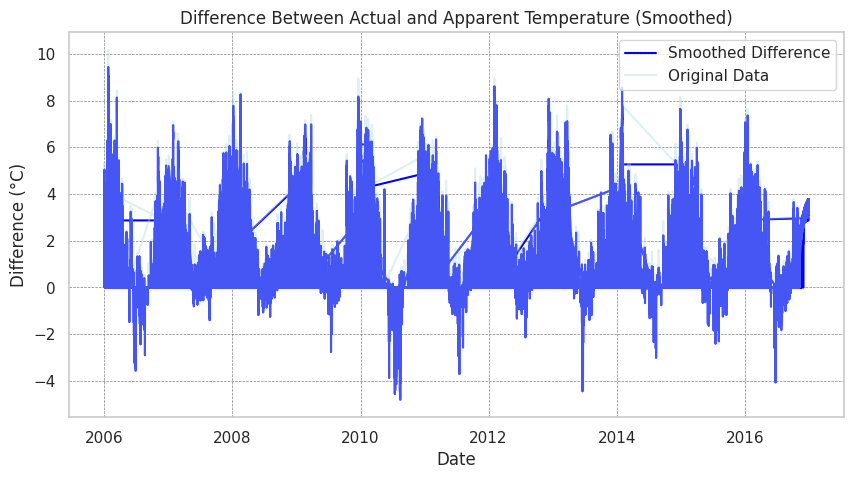

In [60]:
# Optional: Calculate a rolling average to smooth out the line (e.g., over a 7-day period)
data['Difference_Smoothed'] = data["Tempreture Differences"].rolling(window=2).min()  # 7-day average

plt.figure(figsize=(10, 5))

# Plot the smoothed line with reduced marker frequency for clarity
plt.plot(data['Formatted Date'], data['Difference_Smoothed'], linestyle='-', color='blue', label='Smoothed Difference')
plt.plot(data['Formatted Date'], data['Tempreture Differences'], color='lightblue', alpha=0.4, label='Original Data')  # Optional: overlay original data

plt.title('Difference Between Actual and Apparent Temperature (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Difference (°C)')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

In [61]:
# all columns
data.columns


Index(['Day of Week', 'Month', 'Year', 'Date', 'Time', 'Formatted Date',
       'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary', 'discomfort_index', 'Tempreture Differences',
       'Difference_Smoothed'],
      dtype='object')


**Distribution Visualization**

Use box plots or histograms to visualize the distribution of apparent temperatures.

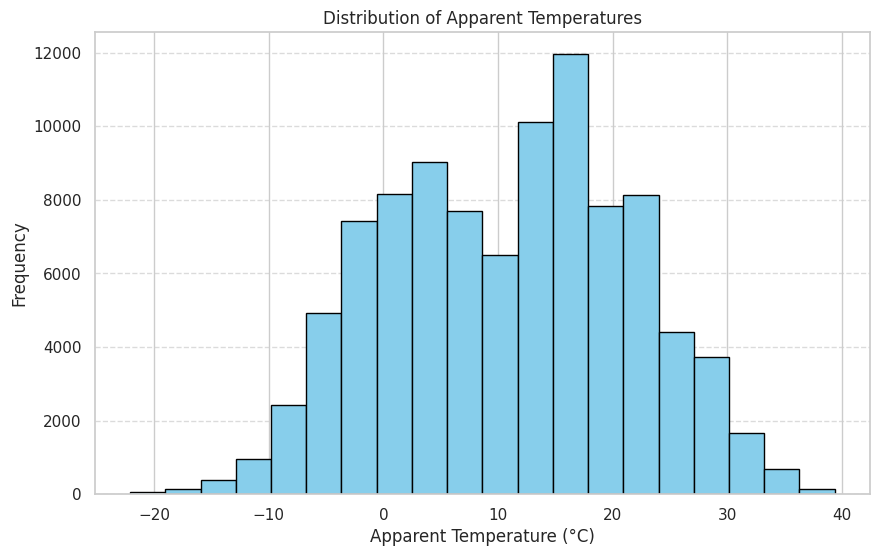

In [62]:
# plot the  histograms to visualize the distribution of apparent temperatures.
plt.figure(figsize=(10, 6))
plt.hist(data['Apparent Temperature (C)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Apparent Temperatures')
plt.xlabel('Apparent Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### **Humidity**


**Descriptive Statistics**

Calculate mean, median, mode, standard deviation, minimum, maximum, and range.



In [63]:
# descriptive stat
data['Humidity'].describe()

,Humidity
count,96402.000000
mean,0.734918
std,0.195415
min,0.000000
25%,0.600000
50%,0.780000
75%,0.890000
max,1.000000


**Distribution Analysis**

Visualize the distribution using histograms and box plots to identify outliers.



<Axes: >

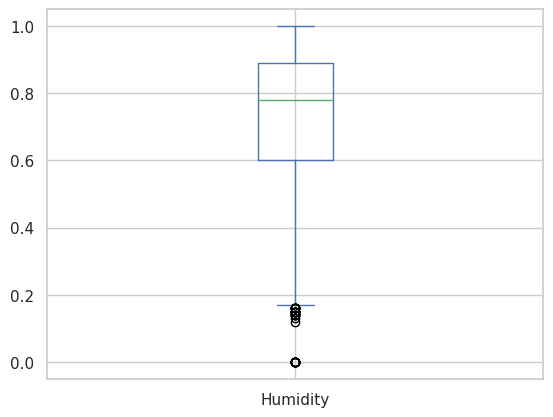

In [64]:
# find the outliers
data['Humidity'].plot(kind='box')

In [65]:
# setlle the outliers
Q1 = data["Humidity"].quantile(0.25)
Q3 = data["Humidity"].quantile(0.75)
# find the IQR
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data["Humidity"] >= lower_bound) & (data["Humidity"] <= upper_bound)]


<Axes: >

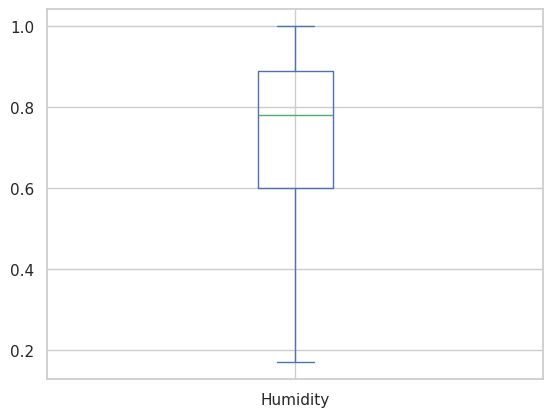

In [66]:
# find the outlier
data['Humidity'].plot(kind='box')

In [67]:
# find trens of the temprature on the basis of monthly
monthly_temp = data.groupby(data['Formatted Date'].dt.month)['Humidity'].mean()
monthly_temp

,Humidity
Formatted Date,
1,0.850802
2,0.815409
3,0.703190
4,0.641175
5,0.691650
6,0.686418
7,0.640491
8,0.635300
9,0.689163


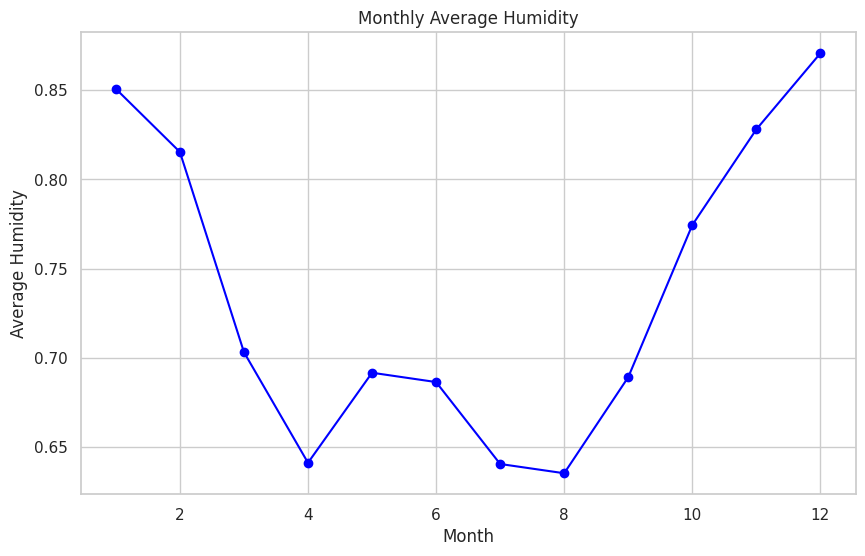

In [68]:
# plot the above data
plt.figure(figsize=(10, 6))
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', linestyle='-', color='blue')
plt.title('Monthly Average Humidity')
plt.xlabel('Month')
plt.ylabel('Average Humidity')
plt.grid(True)
plt.show()


**Correlation Analysis**

Analyze correlations with other weather variables like temperature and precipitation.




In [69]:
# find the correlation with the tempreture
data['Humidity'].corr(data['Temperature (C)'])


-0.636844019196801

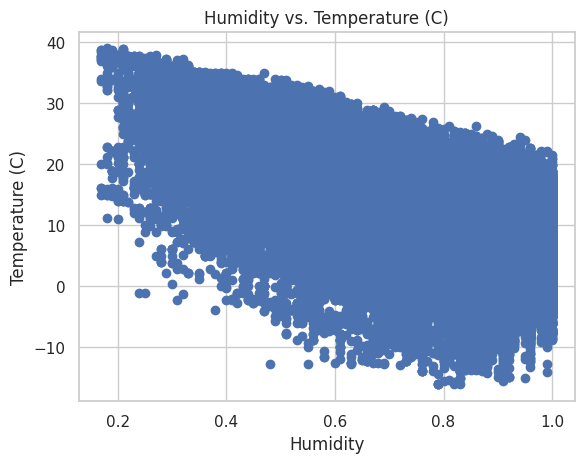

In [70]:
# plot it into the histogram
plt.scatter(data['Humidity'], data['Temperature (C)'])
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.title('Humidity vs. Temperature (C)')
plt.show()

In [71]:
# all the columns
data.columns

Index(['Day of Week', 'Month', 'Year', 'Date', 'Time', 'Formatted Date',
       'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary', 'discomfort_index', 'Tempreture Differences',
       'Difference_Smoothed'],
      dtype='object')

In [72]:
# find the correlation between Humidity and the wind speed
data['Humidity'].corr(data['Wind Speed (km/h)'])


-0.2248915121198371

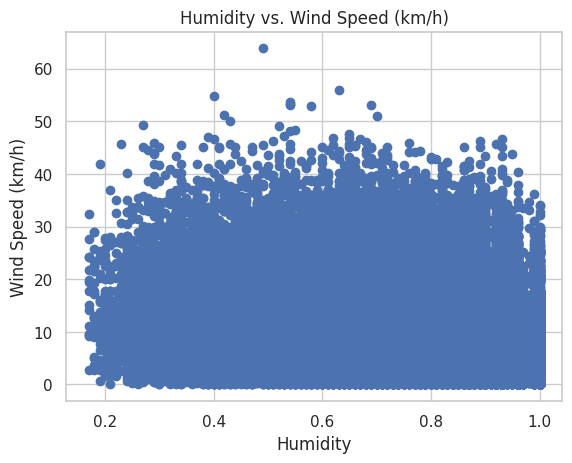

In [73]:
# plot the scatter plot
plt.scatter(data['Humidity'], data['Wind Speed (km/h)'])
plt.xlabel('Humidity')
plt.ylabel('Wind Speed (km/h)')
plt.title('Humidity vs. Wind Speed (km/h)')
plt.show()

In [74]:
# find the correlation between Humidity and Visibility
data['Humidity'].corr(data['Visibility (km)'])


-0.37098826369057386

In [75]:
data.head(1)

,Day of Week,Month,Year,Date,Time,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,discomfort_index,Tempreture Differences,Difference_Smoothed
0,Friday,3,2006,2006-03-31,22:00:00,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,7.604215,2.083333,NaN


In [76]:
# find the type of data
data['Date'].dtype

dtype('O')

In [77]:
# convert the data
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', utc=True)

In [78]:
# verufy the changes
data['Date'].dtype

datetime64[ns, UTC]

In [79]:
# defind the specific year and month
specific_month_data = data[(data['Date'].dt.year == 2006) & (data['Date'].dt.month == 5)]
specific_month_data.head()

,Day of Week,Month,Year,Date,Time,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,discomfort_index,Tempreture Differences,Difference_Smoothed
4368,Wednesday,5,2006,2006-05-31 00:00:00+00:00,22:00:00,2006-05-31 22:00:00+00:00,Partly Cloudy,rain,7.277778,6.133333,0.86,6.7620,272.0,15.8263,0.0,1016.04,Mostly cloudy until night.,5.844303,1.144444,0.0
4369,Wednesday,5,2006,2006-05-31 00:00:00+00:00,23:00:00,2006-05-31 23:00:00+00:00,Partly Cloudy,rain,7.294444,7.294444,0.86,3.8157,299.0,15.8263,0.0,1016.54,Mostly cloudy until night.,5.857687,0.000000,0.0
5833,Monday,5,2006,2006-05-01 00:00:00+00:00,00:00:00,2006-05-01 00:00:00+00:00,Overcast,rain,11.133333,11.133333,0.91,7.5026,145.0,6.9391,0.0,1018.35,Mostly cloudy until night.,8.935936,0.000000,0.0
5834,Monday,5,2006,2006-05-01 00:00:00+00:00,01:00:00,2006-05-01 01:00:00+00:00,Mostly Cloudy,rain,11.600000,11.600000,0.62,17.0338,139.0,15.8746,0.0,1014.08,Mostly cloudy until night.,9.337745,0.000000,0.0
5835,Monday,5,2006,2006-05-01 00:00:00+00:00,02:00:00,2006-05-01 02:00:00+00:00,Mostly Cloudy,rain,11.088889,11.088889,0.71,17.1143,130.0,15.8746,0.0,1014.08,Mostly cloudy until night.,8.918228,0.000000,0.0


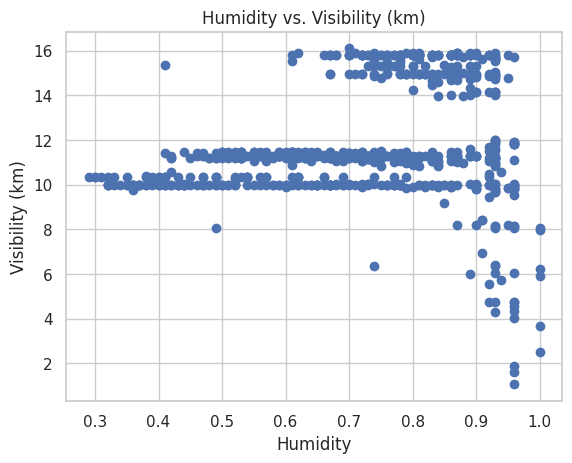

In [80]:
# plot it for a specific months
plt.scatter(specific_month_data['Humidity'], specific_month_data['Visibility (km)'])
plt.xlabel('Humidity')
plt.ylabel('Visibility (km)')
plt.title('Humidity vs. Visibility (km)')
plt.show()


**Time Series Analysis**

Plot humidity trends over time to observe seasonal patterns.


### **Wind Speed (km/h)**


**Descriptive Statistics**

Calculate summary statistics for wind speed.



In [81]:
# calculate the summary statistics for wind speed
data['Wind Speed (km/h)'].describe()

,Wind Speed (km/h)
count,96363.000000
mean,10.810707
std,6.912136
min,0.000000
25%,5.828200
50%,9.965900
75%,14.135800
max,63.852600


**Distribution Analysis**

Create histograms and box plots to visualize wind speed distribution and
identify outliers.



<Axes: >

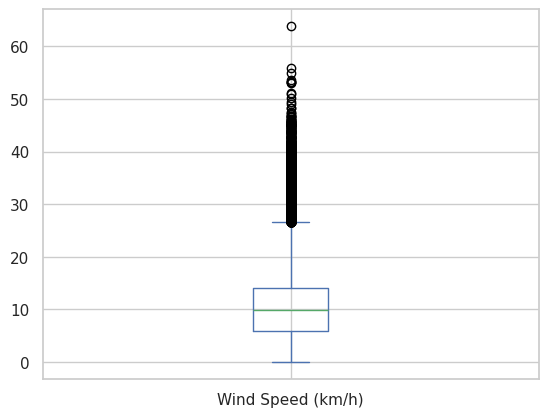

In [82]:
# find the outliers
data['Wind Speed (km/h)'].plot(kind='box')

In [83]:
# settle the outliers
Q1 = data['Wind Speed (km/h)'].quantile(0.25)
Q3 = data['Wind Speed (km/h)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Wind Speed (km/h)'] >= lower_bound) & (data['Wind Speed (km/h)'] <= upper_bound)]

<Axes: >

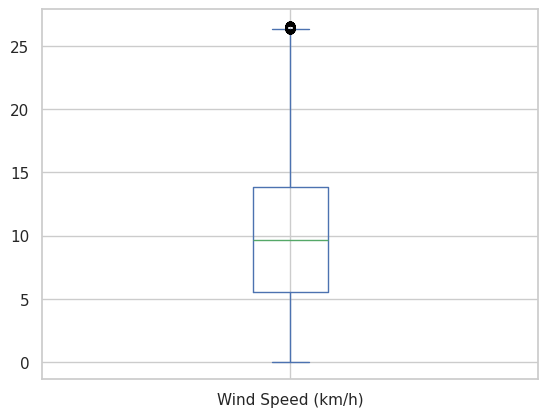

In [84]:
# check the outliers
data['Wind Speed (km/h)'].plot(kind='box')

<Axes: >

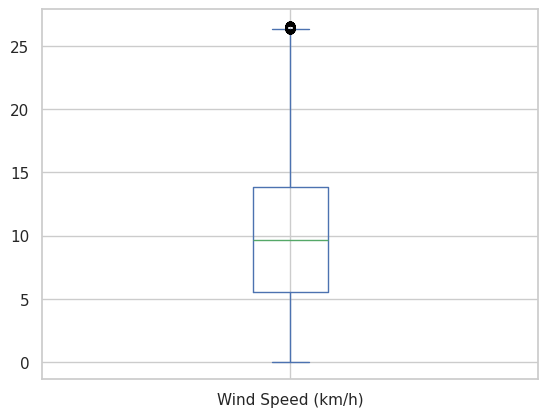

In [85]:
# remove the outliers whic is greater than 3rd quartile
data = data[data['Wind Speed (km/h)'] <= data['Wind Speed (km/h)'].quantile(1.0)]
data['Wind Speed (km/h)'].plot(kind='box')

**Correlation Analysis**

Investigate correlations with temperature, humidity, and precipitation types.




In [86]:
# find the correlation with temperature
data['Wind Speed (km/h)'].corr(data['Temperature (C)'])

0.03325285826750722

In [87]:

# defind the specific year and month
specific_month_data = data[(data['Date'].dt.year == 2006) & (data['Date'].dt.month == 5)]
specific_month_data.head(1)

,Day of Week,Month,Year,Date,Time,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,discomfort_index,Tempreture Differences,Difference_Smoothed
4368,Wednesday,5,2006,2006-05-31 00:00:00+00:00,22:00:00,2006-05-31 22:00:00+00:00,Partly Cloudy,rain,7.277778,6.133333,0.86,6.762,272.0,15.8263,0.0,1016.04,Mostly cloudy until night.,5.844303,1.144444,0.0


<ipython-input-88-7122ab04692e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_month_data['Wind Speed Bin'] = pd.cut(specific_month_data['Wind Speed (km/h)'], bins=36)  # e.g., 10-degree bins
<ipython-input-88-7122ab04692e>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_temp_by_bearing = specific_month_data.groupby('Wind Speed Bin')['Temperature (C)'].mean()


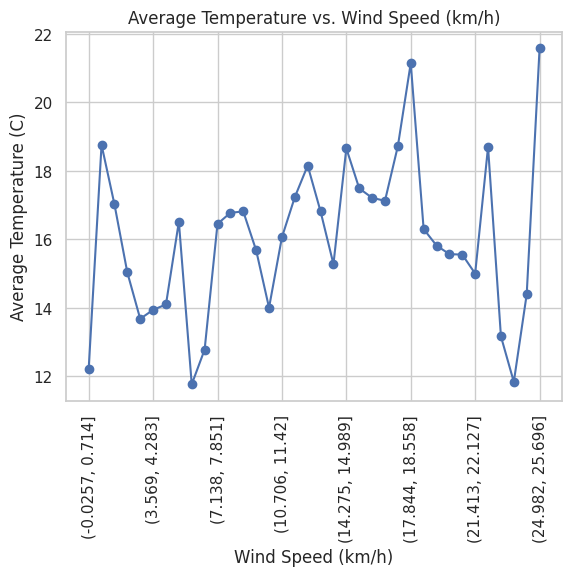

In [88]:
# plot it for a sepcific date and year
# Binning wind bearings into categories for a line plot
specific_month_data['Wind Speed Bin'] = pd.cut(specific_month_data['Wind Speed (km/h)'], bins=36)  # e.g., 10-degree bins

# Calculate average temperature for each bin
avg_temp_by_bearing = specific_month_data.groupby('Wind Speed Bin')['Temperature (C)'].mean()

# Plot
avg_temp_by_bearing.plot(kind='line', marker='o')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Average Temperature (C)')
plt.title('Average Temperature vs. Wind Speed (km/h)')
plt.xticks(rotation=90)
plt.show()


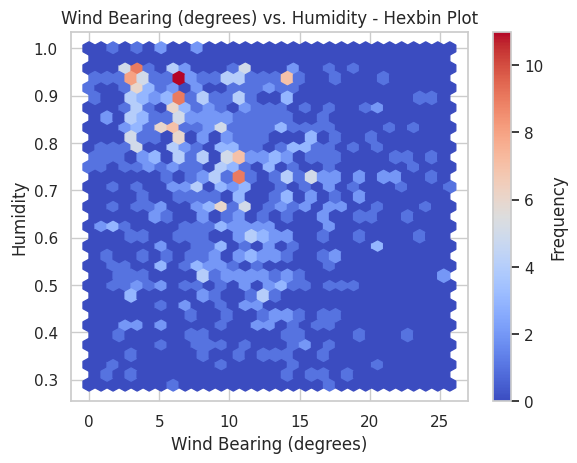

In [89]:
# find the correlation between humidity
data['Wind Speed (km/h)'].corr(data['Humidity'])

# plot it as well for a specific months and year
# Hexbin plot for specific month and year
plt.hexbin(specific_month_data['Wind Speed (km/h)'], specific_month_data['Humidity'], gridsize=30, cmap='coolwarm')
plt.colorbar(label='Frequency')
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Humidity')
plt.title('Wind Bearing (degrees) vs. Humidity - Hexbin Plot')
plt.show()


**Wind Speed by Precipitation Type**

Analyze how wind speed varies with different types of precipitation.


In [90]:
# check how wind speed is varies with precipation type
data.groupby('Precip Type')['Wind Speed (km/h)'].mean()


,Wind Speed (km/h)
Precip Type,
rain,10.287260
snow,8.969122


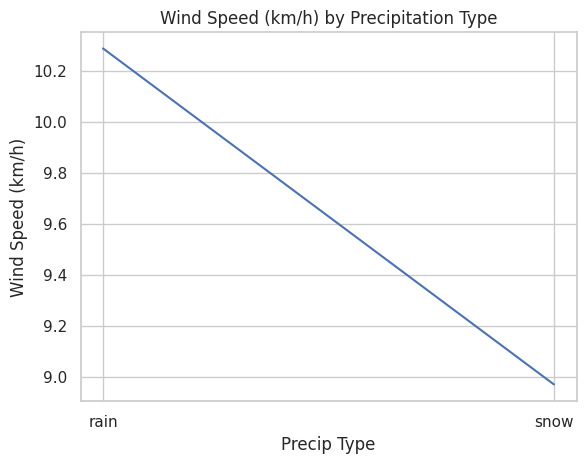

In [91]:
# plot it into the line plot for define difference
plt.plot(data.groupby('Precip Type')['Wind Speed (km/h)'].mean())
plt.xlabel('Precip Type')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed (km/h) by Precipitation Type')
plt.show()

### **Wind Bearing (degrees)**



**Descriptive Statistics**

Analyze summary statistics for wind bearing.



In [92]:
data['Wind Bearing (degrees)'].describe()

,Wind Bearing (degrees)
count,93339.000000
mean,186.272244
std,107.232807
min,0.000000
25%,112.000000
50%,180.000000
75%,289.000000
max,359.000000


**Correlation Analysis**

Explore the relationship between wind bearing and other numerical variables like temperature or wind speed.

<ipython-input-93-399865fd0e99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_month_data['Wind Bearing Bin'] = pd.cut(specific_month_data['Wind Bearing (degrees)'], bins=36)  # e.g., 10-degree bins
<ipython-input-93-399865fd0e99>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_temp_by_bearing = specific_month_data.groupby('Wind Bearing Bin')['Temperature (C)'].mean()


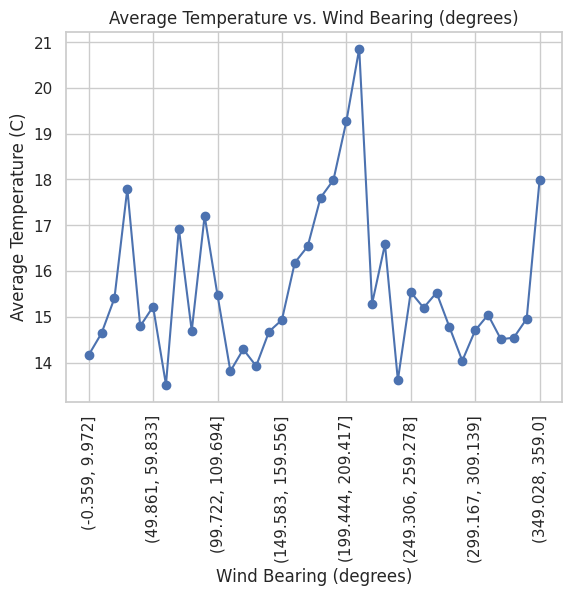

In [93]:
# Binning wind bearings into categories for a line plot
specific_month_data['Wind Bearing Bin'] = pd.cut(specific_month_data['Wind Bearing (degrees)'], bins=36)  # e.g., 10-degree bins

# Calculate average temperature for each bin
avg_temp_by_bearing = specific_month_data.groupby('Wind Bearing Bin')['Temperature (C)'].mean()

# Plot
avg_temp_by_bearing.plot(kind='line', marker='o')
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Average Temperature (C)')
plt.title('Average Temperature vs. Wind Bearing (degrees)')
plt.xticks(rotation=90)
plt.show()


<ipython-input-94-9326f935f29b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_temp_by_bearing = specific_month_data.groupby('Wind Bearing Bin')['Wind Speed (km/h)'].mean()


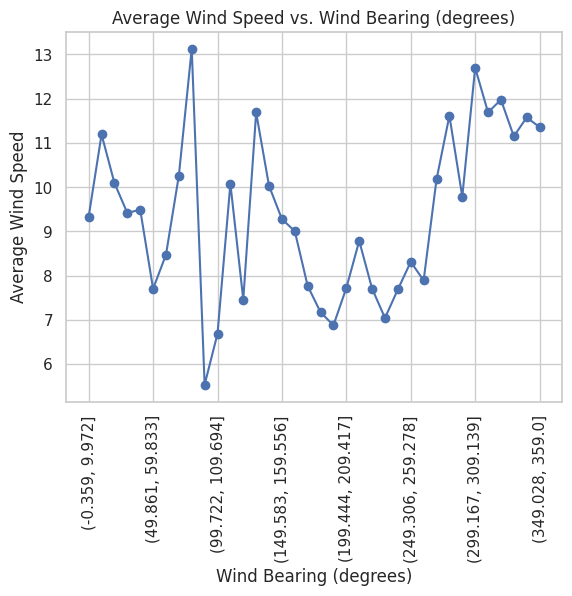

In [94]:
# Calculate average temperature for each bin
avg_temp_by_bearing = specific_month_data.groupby('Wind Bearing Bin')['Wind Speed (km/h)'].mean()

# Plot
avg_temp_by_bearing.plot(kind='line', marker='o')
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Average Wind Speed')
plt.title('Average Wind Speed vs. Wind Bearing (degrees)')
plt.xticks(rotation=90)
plt.show()



**Visualization**

Use circular plots or wind rose diagrams to visualize the distribution of wind directions.



In [95]:
# pip install windrose

In [96]:
from windrose import WindroseAxes

<Figure size 800x800 with 0 Axes>

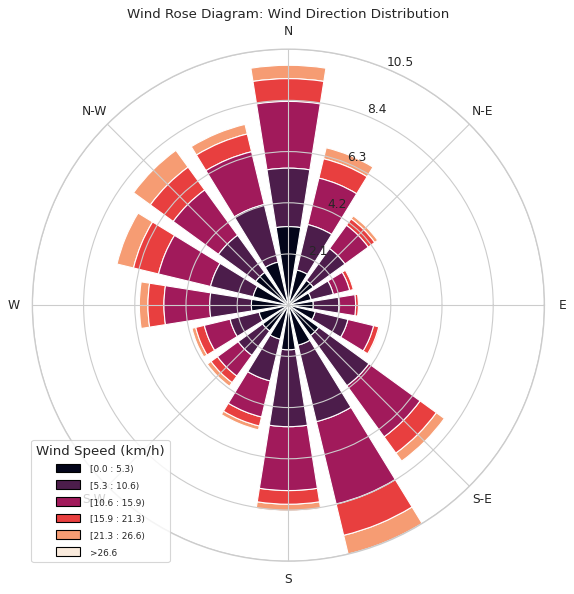

In [97]:
# Plot a wind rose
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(data['Wind Bearing (degrees)'], data['Wind Speed (km/h)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (km/h)")

plt.title("Wind Rose Diagram: Wind Direction Distribution")
plt.show()

### **Visibility (km)**




**Descriptive Statistics**

Calculate mean, median, mode, standard deviation, minimum, maximum, and range.



In [98]:
data['Visibility (km)'].describe()

,Visibility (km)
count,93339.000000
mean,10.329197
std,4.221117
min,0.000000
25%,8.194900
50%,10.030300
75%,14.876400
max,16.100000



**Distribution Analysis**

Visualize visibility data with histograms and box plots.

<Axes: >

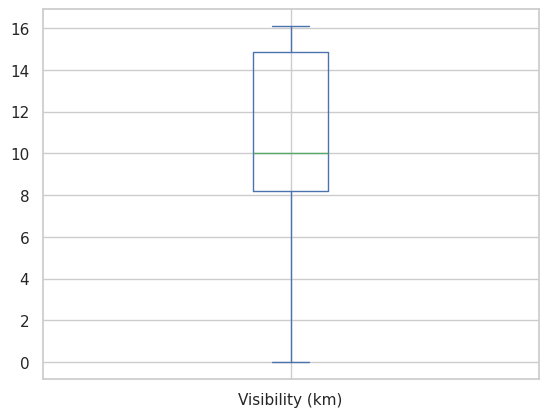

In [99]:
# find the outliers
data['Visibility (km)'].plot(kind='box')


**Correlation Analysis**

Investigate how visibility correlates with weather conditions, temperature, and humidity.



In [100]:
data.columns

Index(['Day of Week', 'Month', 'Year', 'Date', 'Time', 'Formatted Date',
       'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary', 'discomfort_index', 'Tempreture Differences',
       'Difference_Smoothed'],
      dtype='object')

In [101]:
# fijnd how visibility related to tempreture
data['Visibility (km)'].corr(data['Temperature (C)'])


0.3987382562457845

<Figure size 600x600 with 0 Axes>

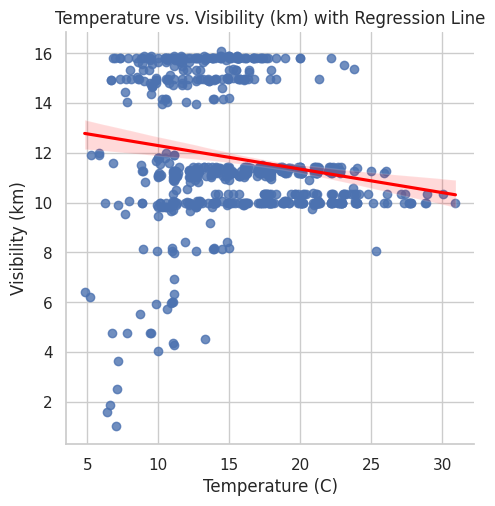

In [102]:
# define the size of the plot
plt.figure(figsize=(6, 6))
# Scatter plot with regression line

sns.lmplot(x='Temperature (C)', y='Visibility (km)', data=specific_month_data, line_kws={'color': 'red'})
plt.xlabel('Temperature (C)')
plt.ylabel('Visibility (km)')
plt.title('Temperature vs. Visibility (km) with Regression Line')
plt.show()


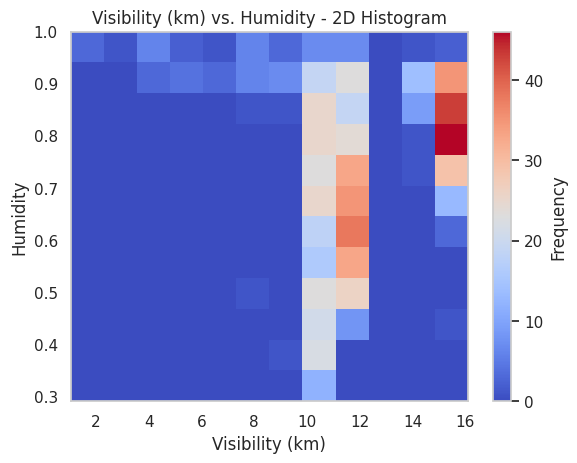

In [103]:
# 2D histogram plot for specific month and year
plt.hist2d(specific_month_data['Visibility (km)'], specific_month_data['Humidity'], bins=12, cmap='coolwarm')
plt.colorbar(label='Frequency')
plt.xlabel('Visibility (km)')
plt.ylabel('Humidity')
plt.title('Visibility (km) vs. Humidity - 2D Histogram')
plt.show()


**Time Series Analysis**

Analyze trends in visibility over time.

### **Loud Cover**


**Frequency Counts**

Determine the frequency of different levels of loud cover (e.g., percentage of cloud cover).


In [104]:
# find the nan value
data['Loud Cover'].isnull().sum()


0

In [105]:
data['Loud Cover'].head()

,Loud Cover
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [106]:
# values count of the loud cover
data['Loud Cover'].value_counts()

,count
Loud Cover,
0.0,93339



**Descriptive Statistics**

Calculate summary statistics for loud cover values.


In [107]:
data['Loud Cover'].describe()

,Loud Cover
count,93339.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0



**Distribution Analysis**

Visualize the distribution using histograms or box plots.



**Impact Analysis**

Analyze the relationship between loud cover and other variables like temperature and precipitation.

In [108]:
data['Loud Cover'].corr(data['Temperature (C)'])

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


nan

### **Pressure (millibars)**


**Descriptive Statistics**

Compute summary statistics for atmospheric pressure.

In [109]:
data['Pressure (millibars)'].describe()

,Pressure (millibars)
count,93339.000000
mean,1003.968321
std,114.538808
min,0.000000
25%,1012.090000
50%,1016.560000
75%,1021.180000
max,1046.380000



**Distribution Analysis**

Create visualizations (histograms, box plots) to analyze the distribution of pressure values.

<Axes: >

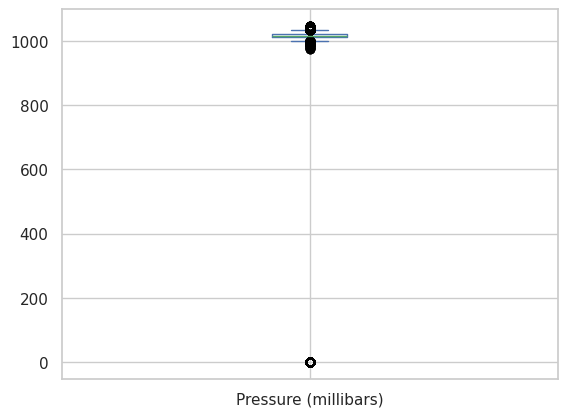

In [110]:
# find the outliers
data['Pressure (millibars)'].plot(kind='box')

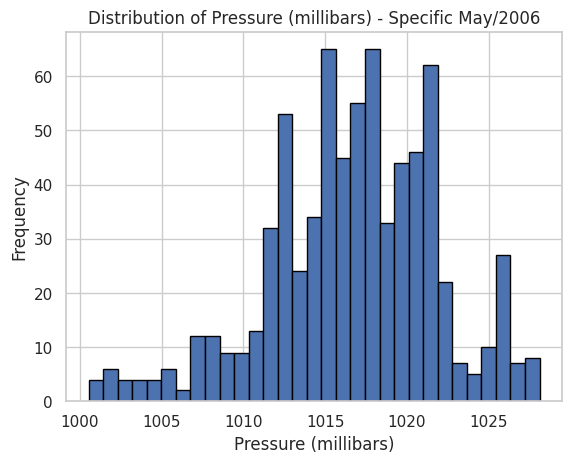

In [111]:
# plot the histogram to analyze the distribution for a specific month and year
plt.hist(specific_month_data['Pressure (millibars)'], bins=31, edgecolor='black')
plt.xlabel('Pressure (millibars)')
plt.ylabel('Frequency')
plt.title('Distribution of Pressure (millibars) - Specific May/2006')
plt.show()


**Correlation Analysis**

Explore the relationship between pressure and other weather variables like temperature and humidity.

In [112]:
# find the correlation between temprarture and pressure
data['Pressure (millibars)'].corr(data['Temperature (C)'])


-0.008335681320453592

<ipython-input-113-70bf4430c59f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_month_data['Pressure Bin'] = pd.cut(specific_month_data['Pressure (millibars)'], bins=36)  # e.g., 10-degree bins
<ipython-input-113-70bf4430c59f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_temp_by_bearing = specific_month_data.groupby('Pressure Bin')['Temperature (C)'].mean()


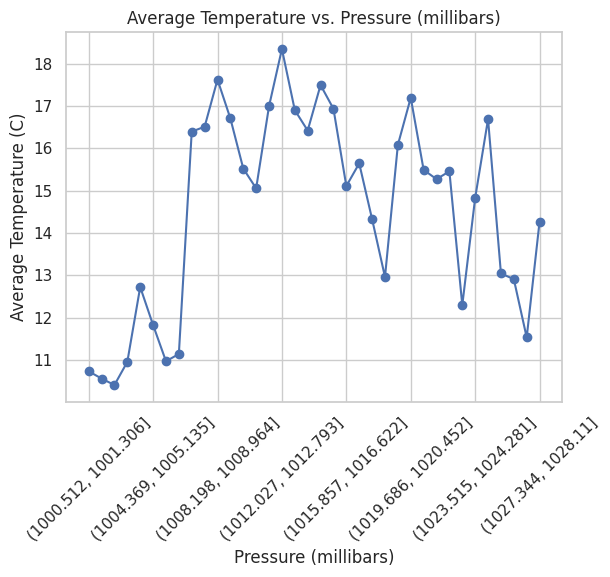

In [113]:
# plot the line plot
# Binning Pressures into categories for a line plot
specific_month_data['Pressure Bin'] = pd.cut(specific_month_data['Pressure (millibars)'], bins=36)  # e.g., 10-degree bins

# Calculate average temperature for each bin
avg_temp_by_bearing = specific_month_data.groupby('Pressure Bin')['Temperature (C)'].mean()

# Plot
avg_temp_by_bearing.plot(kind='line', marker='o')
plt.xlabel('Pressure (millibars)')
plt.ylabel('Average Temperature (C)')
plt.title('Average Temperature vs. Pressure (millibars)')
plt.xticks(rotation=45)
plt.show()

In [114]:
# find the correclartion for preasure and wind speed
data['Pressure (millibars)'].corr(data['Wind Speed (km/h)'])


-0.03611954724196291

<ipython-input-115-f055e95e801f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_temp_by_bearing = specific_month_data.groupby('Pressure Bin')['Wind Speed (km/h)'].mean()


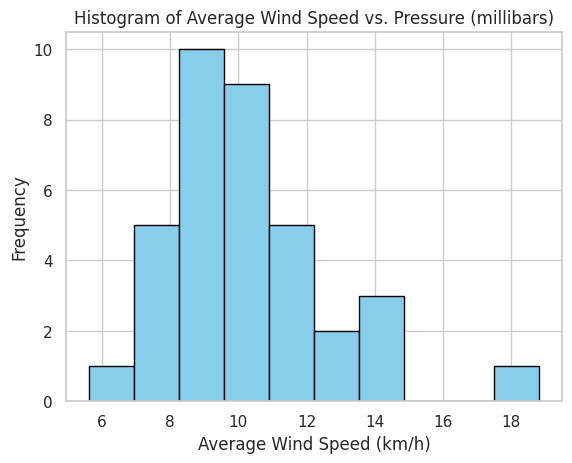

In [115]:
# Histogram plot for average wind speed vs. pressure bins
avg_temp_by_bearing = specific_month_data.groupby('Pressure Bin')['Wind Speed (km/h)'].mean()

# Plot histogram
plt.hist(avg_temp_by_bearing, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Average Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Histogram of Average Wind Speed vs. Pressure (millibars)')
plt.show()


In [116]:
# find the correlation between pressure and humadity
data['Pressure (millibars)'].corr(data['Humidity'])

0.0031020688378774466

<ipython-input-117-ae761d8148b6>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_temp_by_bearing = specific_month_data.groupby('Pressure Bin')['Humidity'].mean()


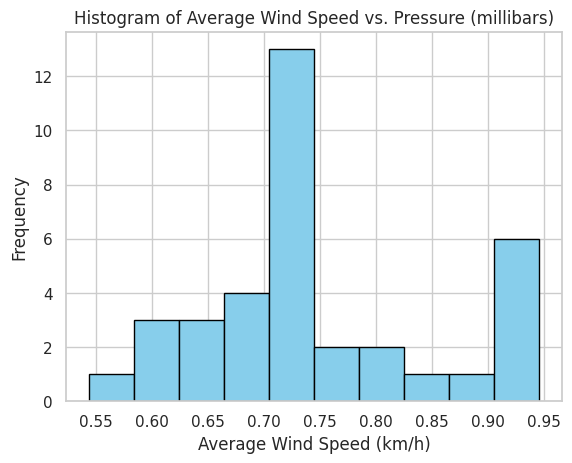

In [117]:
# plot the
# Calculate average Humidity for each bin
avg_temp_by_bearing = specific_month_data.groupby('Pressure Bin')['Humidity'].mean()

# Plot histogram
plt.hist(avg_temp_by_bearing, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Average Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Histogram of Average Wind Speed vs. Pressure (millibars)')
plt.show()


**Trend Analysis**

Examine changes in pressure over time and its potential impact on weather conditions.


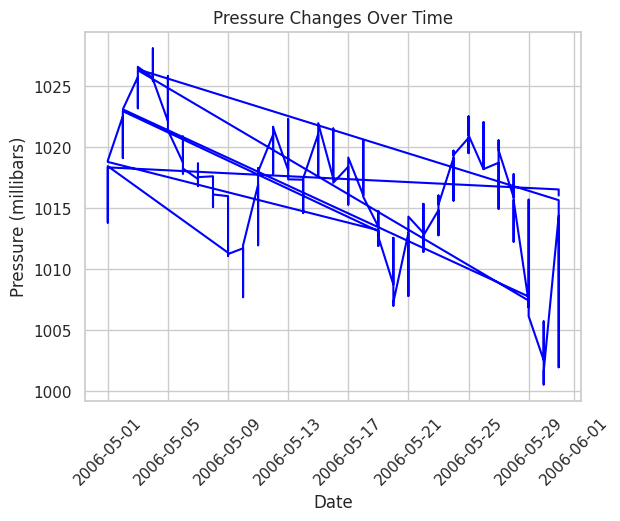

In [118]:
import matplotlib.pyplot as plt

# Plot pressure over time
plt.plot(specific_month_data['Date'], specific_month_data['Pressure (millibars)'], color='blue')
plt.xlabel('Date')
plt.ylabel('Pressure (millibars)')
plt.title('Pressure Changes Over Time')
plt.xticks(rotation=45)
plt.show()


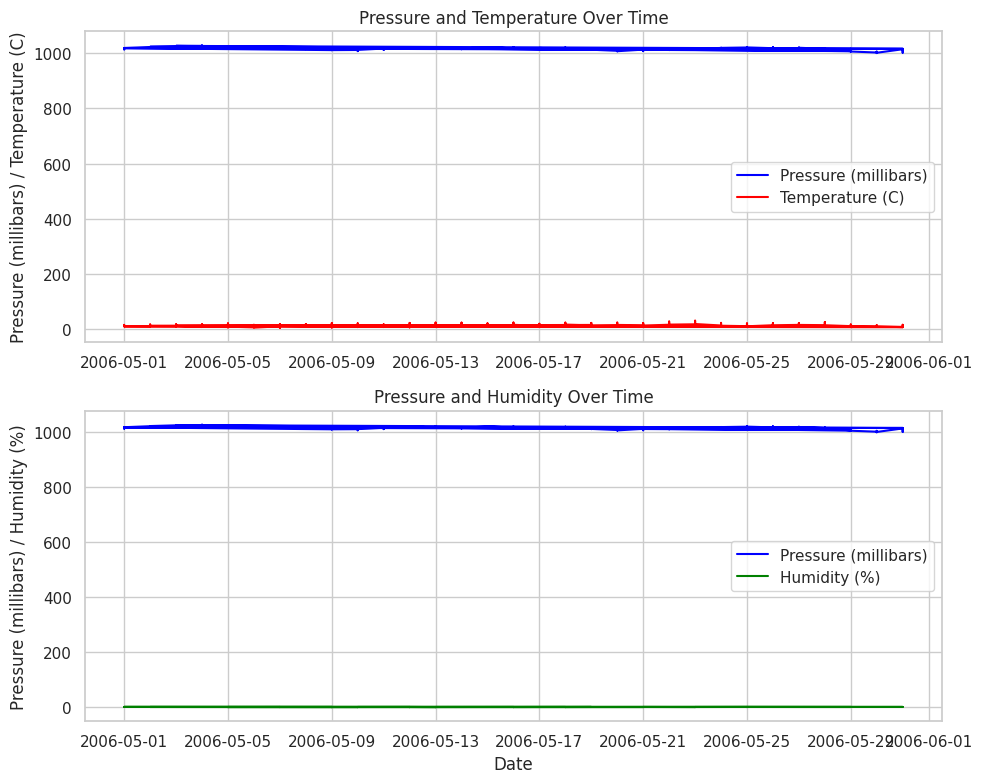

In [119]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Pressure vs Temperature
ax[0].plot(specific_month_data['Date'], specific_month_data['Pressure (millibars)'], color='blue', label='Pressure (millibars)')
ax[0].plot(specific_month_data['Date'], specific_month_data['Temperature (C)'], color='red', label='Temperature (C)')
ax[0].set_ylabel('Pressure (millibars) / Temperature (C)')
ax[0].set_title('Pressure and Temperature Over Time')
ax[0].legend()

# Pressure vs Humidity
ax[1].plot(specific_month_data['Date'], specific_month_data['Pressure (millibars)'], color='blue', label='Pressure (millibars)')
ax[1].plot(specific_month_data['Date'], specific_month_data['Humidity'], color='green', label='Humidity (%)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Pressure (millibars) / Humidity (%)')
ax[1].set_title('Pressure and Humidity Over Time')
ax[1].legend()

plt.tight_layout()
plt.show()


In [120]:
correlation_matrix = data[['Pressure (millibars)', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)']].corr()
correlation_matrix.head()


,Pressure (millibars),Temperature (C),Humidity,Wind Speed (km/h)
Pressure (millibars),1.000000,-0.008336,0.003102,-0.036120
Temperature (C),-0.008336,1.000000,-0.643756,0.033253
Humidity,0.003102,-0.643756,1.000000,-0.223250
Wind Speed (km/h),-0.036120,0.033253,-0.223250,1.000000


<ipython-input-121-0dcbc3ab0e88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_month_data['Rolling Pressure'] = specific_month_data['Pressure (millibars)'].rolling(window=7).mean()


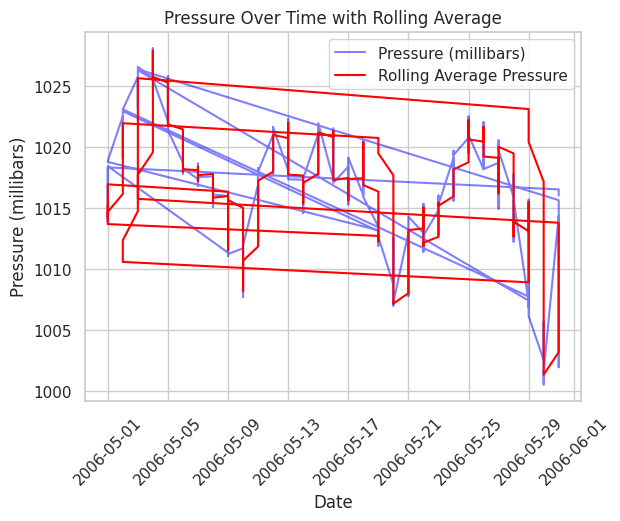

In [121]:
# Calculate a rolling average with a window size of 7 days (adjust as needed)
specific_month_data['Rolling Pressure'] = specific_month_data['Pressure (millibars)'].rolling(window=7).mean()

# Plot original and rolling average of pressure
plt.plot(specific_month_data['Date'], specific_month_data['Pressure (millibars)'], color='blue', alpha=0.5, label='Pressure (millibars)')
plt.plot(specific_month_data['Date'], specific_month_data['Rolling Pressure'], color='red', label='Rolling Average Pressure')
plt.xlabel('Date')
plt.ylabel('Pressure (millibars)')
plt.title('Pressure Over Time with Rolling Average')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### **Daily Summary**


**Text Analysis**

Similar to the Summary column, perform text analysis to identify common phrases or themes in daily summaries.

In [122]:
# find the unique values for thedaily summary
data["Daily Summary"].head()

,Daily Summary
0,Partly cloudy throughout the day.
1,Partly cloudy throughout the day.
2,Partly cloudy throughout the day.
3,Partly cloudy throughout the day.
4,Partly cloudy throughout the day.



**Categorization**

Group the daily summaries into categories based on common weather conditions.


In [132]:
# Group by the weather category
grouped_data = data.groupby('Summary')['Daily Summary'].apply(list).reset_index()
grouped_data.head()



,Summary,Daily Summary
0,Clear,"[Partly cloudy until night., Foggy starting ov..."
1,Drizzle,"[Light rain in the morning., Light rain until ..."
2,Dry,[Partly cloudy starting in the afternoon conti...
3,Dry and Mostly Cloudy,"[Partly cloudy throughout the day., Partly clo..."
4,Dry and Partly Cloudy,[Partly cloudy starting in the morning continu...


**Sentiment Analysis**

If applicable, analyze the sentiment of daily summaries to gauge overall weather sentiment.